In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from IPython.display import Image
from qutip import *
from math import sqrt


from qutip.qip.device import Processor
from qutip_qip.device import CavityQEDModel
from qutip_qip.device import DispersiveCavityQED
from qutip.qip.compiler import CavityQEDCompiler
from qutip.qip.pulse import Pulse
from qutip.operators import sigmaz, sigmay, sigmax, destroy
from qutip.states import basis
from qutip.metrics import fidelity
from qutip.qip.operations import rx, ry, rz, hadamard_transform
from qutip.qip.circuit import QubitCircuit

In [33]:
GHz = 10**9 #Hz
wq1 = 3.04 * 2* np.pi#* GHz # 6.617 * GHz * 2* np.pi # wq = sqrt(8EjEc)
wq2 = 3.00 * 2* np.pi#* GHz # 2.88 * GHz * 2* np.pi # 6.529 * GHz * 2* np.pi
wc = 3 * 2 * np.pi #* GHz # 5.19 * GHz * 2 * np.pi
g1 = 0.04 * 2 * np.pi #* GHz  # 0.105 * GHz * 2 * np.pi
g2 = 0.04 * 2 * np.pi #* GHz # g1
# cavity dissapation rate
kappa = 0#0.033 * 2 * np.pi * GHz
# qubit dissapation rate
gamma1 = 0.0#0.00261 * GHz * 2* np.pi
gamma2 = gamma1
num_qubits = 1

In [34]:
# add operators and make circuit
T2 = 5
qc = QubitCircuit(1)
qc.add_gate("RZ", 0, arg_value=np.pi)
# tlist = np.arange(0.00, 20.2, 0.2) # later

In [41]:
# https://notebook.community/qutip/qutip-notebooks/examples/qip-noisy-device-simulator
# still don't know how to add detuning of qubits
# model = CavityQEDModel(num_qubits=num_qubits, w0=wc, g=g1)
processor = DispersiveCavityQED(num_qubits=num_qubits, w0=wc, g=g1)
processor.add_control(sigmaz())
#processor.load_circuit(qc)

/opt/anaconda3/envs/qutip-env/lib/python3.10/site-packages/qutip_qip/device/cavityqed.py:337: UserWarning: The rotating-wave approximation might not be valid.
  warnings.warn(


Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]


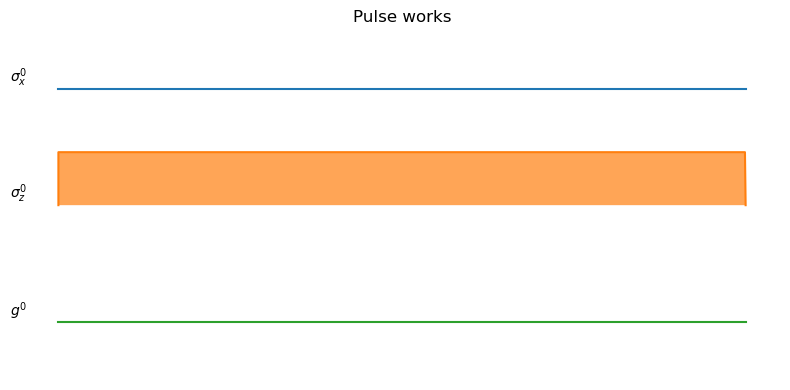

In [39]:
# to run a simulation with the processor, need to have a quantum circuit to evolve
#initial state to feed in, not sure what dims should be
psi0 = basis([10, 2], [0, 0]) 

# operator to get expectation value for, not sure what dims should be
a = tensor(destroy(2),qeye(2))
n = a.dag()*a

# pass in expectation values to get
result = processor.run_state(psi0, tlist = tlist, options=Options(nsteps=50000))

# print this out to see whether it worked
final_state = result.states[-1].ptrace([1])
print(final_state)
# print(result)
processor.plot_pulses(title="Pulse works", figsize=(8, 4), dpi=100);

In [117]:
a = destroy(2)
Hadamard = snot()
plus_state =  basis([10,2],[0,0])
op = tensor(qeye(10), Hadamard*a.dag()*a*Hadamard)
T2 = 5

processor = DispersiveCavityQED(1,w0=wc,g=g1,t2=T2)
processor.add_control(sigmaz(), targets=0)
print(processor.pulses)
processor.pulses[0].coeff = np.ones(len(tlist))
processor.pulses[0].tlist = tlist
tlist = np.arange(0.00, 20.2, 0.2)
result = processor.run_state(
    plus_state, tlist=tlist, e_ops=op)
result.expect[0][:-1]

fig, ax = plt.subplots()
# detail about length of tlist needs to be fixed
ax.plot(tlist[:-1], result.expect[0][:-1], '.', label="simulation")
ax.plot(tlist[:-1], np.exp(-1./T2*tlist[:-1])*0.5 + 0.5, label="theory")
ax.set_xlabel("t")
ax.set_ylabel("Ramsey signal")
ax.legend()
ax.set_title("Relaxation T2=5")
ax.grid()
fig.tight_layout()
fig.show()

[]


AttributeError: 'list' object has no attribute 'coeff'

/var/folders/m6/1pcn_m250l175cmxwtstjnxh0000gn/T/ipykernel_921/3853142120.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


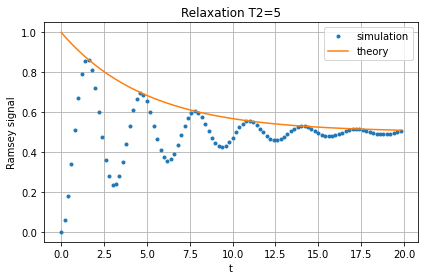

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import sigmaz, destroy, basis
from qutip.qip.device import Processor
from qutip.qip.operations import snot

a = destroy(2)
Hadamard = snot()
plus_state = (basis(2,1) + basis(2,0)).unit()
tlist = np.arange(0.00, 20.2, 0.2)

T2 = 5
processor = Processor(1, t2=T2)
processor.add_control(sigmaz())
processor.pulses[0].coeff = np.ones(len(tlist))
processor.pulses[0].tlist = tlist
result = processor.run_state(
    plus_state, e_ops=[Hadamard*a.dag()*a*Hadamard])

fig, ax = plt.subplots()
# detail about length of tlist needs to be fixed
ax.plot(tlist[:-1], result.expect[0][:-1], '.', label="simulation")
ax.plot(tlist[:-1], np.exp(-1./T2*tlist[:-1])*0.5 + 0.5, label="theory")
ax.set_xlabel("t")
ax.set_ylabel("Ramsey signal")
ax.legend()
ax.set_title("Relaxation T2=5")
ax.grid()
fig.tight_layout()
fig.show()